Name:- Atharva Ingale          
Registration No.:- 21BCE10275                    
Assignment 4     

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Task 1: Load the dataset




      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

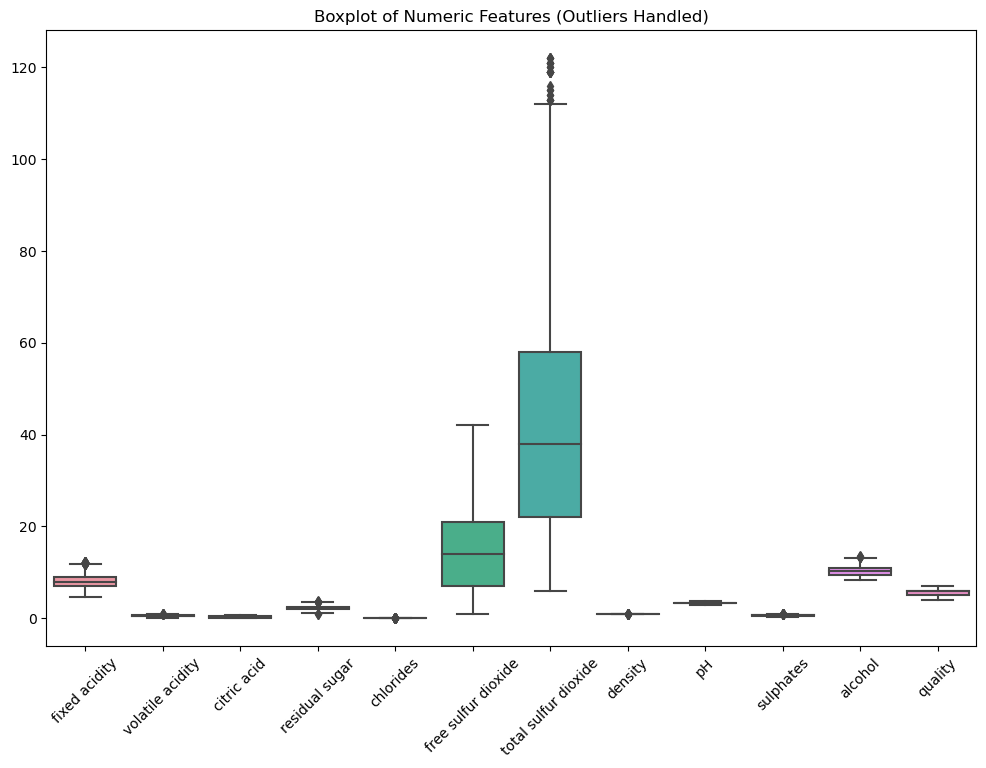

In [39]:
# Task 1: Load the dataset
print("Task 1: Load the dataset\n\n\n\n")
missing_values = ["", "NA", "N/A", "NaN"]
winequality = pd.read_csv('A:\\VIT Bhopal\\AI and ML with smartbridge google\\winequality-red.csv', na_values=missing_values)
print(winequality)

# Find and handle missing values
missing_values = winequality.isnull().sum()
print("\n\nMissing Values:")
print(missing_values)

# Replace missing values with column means
winequality.fillna(winequality.mean(), inplace=True)
print("\nMissing Values After Handling:")
print(winequality.isnull().sum(), "\n\n")

# Find and handle outliers
def find_and_handle_outliers(column):
    Q1 = winequality[column].quantile(0.25)
    Q3 = winequality[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (winequality[column] < lower_bound) | (winequality[column] > upper_bound)
    
    if outliers.sum() > 0:
        print(f"Outliers in {column}:")
        print(winequality[outliers])
        print("\n")

    winequality.loc[outliers, column] = winequality[column].mean()

# Apply outlier handling to numeric columns
numeric_columns = winequality.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    find_and_handle_outliers(column)

# Visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=winequality[numeric_columns])
plt.title("Boxplot of Numeric Features (Outliers Handled)")
plt.xticks(rotation=45)
plt.show()

Task 2: Data preprocessing including visualization




       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000        1599.00000  1599.000000     1599.000000   
mean        8.167394           0.52064     0.270520        2.214643   
std         1.490441           0.16559     0.193945        0.439827   
min         4.600000           0.12000     0.000000        0.900000   
25%         7.100000           0.39000     0.090000        1.900000   
50%         7.900000           0.52000     0.260000        2.200000   
75%         9.000000           0.63000     0.420000        2.538806   
max        12.300000           1.01000     0.790000        3.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.079366            15.199029             43.116778     0.996735   
std       0.014506             9.140046             26.749839     0.001

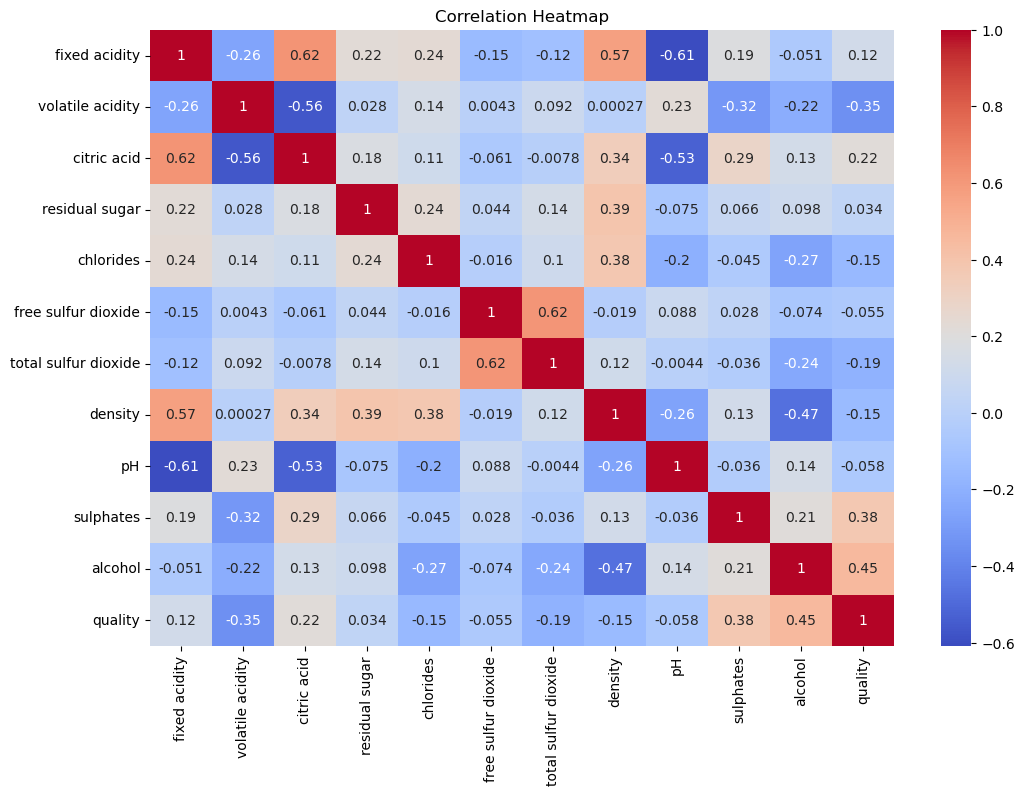

In [40]:
# Task 2: Data preprocessing including visualization
print("Task 2: Data preprocessing including visualization\n\n\n\n")

# Summary statistics
print(winequality.describe())

# Correlation heatmap
correlation_matrix = winequality.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
# Task 3: Machine Learning Model building
print("Task 3: Machine Learning Model building\n")

print("simple linear regression model\n\n")

# Split the data into features (X) and target (y)
X = winequality.drop(columns=["quality"])
y = winequality["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:\n", model.coef_)
print("\nIntercept:", model.intercept_)

# Predict wine quality on the test set
y_pred = model.predict(X_test)


Task 3: Machine Learning Model building

simple linear regression model


Coefficients:
 [ 2.76473387e-02 -7.79557572e-01 -1.97372126e-01  3.08511810e-02
 -8.45068967e-01  2.83769828e-03 -2.62366581e-03 -1.69720757e+01
 -3.05377648e-01  1.53115721e+00  2.47871989e-01]

Intercept: 20.298968156503356


In [42]:
# Predict wine quality on the test set
y_pred = model.predict(X_test)

# Task 4: Evaluate the model
print("Task 4: Evaluate the model\n\n")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Task 4: Evaluate the model


Mean Squared Error: 0.3471079906969371
R-squared: 0.3647650475176243


In [43]:
# Task 5: Test with random observation
print("Task 5: Test with random observation\n\n")

observations = [
    {
        'fixed acidity': 7.0,
        'volatile acidity': 0.6,
        'citric acid': 0.1,
        'residual sugar': 2.1,
        'chlorides': 0.07,
        'free sulfur dioxide': 25.0,
        'total sulfur dioxide': 60.0,
        'density': 0.995,
        'pH': 3.0,
        'sulphates': 0.5,
        'alcohol': 10.0
    },
    {
        'fixed acidity': 7.2,
        'volatile acidity': 0.42,
        'citric acid': 0.24,
        'residual sugar': 2.5,
        'chlorides': 0.076,
        'free sulfur dioxide': 15.0,
        'total sulfur dioxide': 37.0,
        'density': 0.995,
        'pH': 3.2,
        'sulphates': 0.58,
        'alcohol': 9.0
    },
]

# Create a DataFrame from the list of observations
test_data = pd.DataFrame(observations)
print("Test_data:\n", test_data)

# Predict the quality for each observation
predicted_qualities = model.predict(test_data)
print("\n\n\n\nPredicted Qualities:", predicted_qualities)

Task 5: Test with random observation


Test_data:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.60         0.10             2.1      0.070   
1            7.2              0.42         0.24             2.5      0.076   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                 25.0                  60.0    0.995  3.0       0.50     10.0  
1                 15.0                  37.0    0.995  3.2       0.58      9.0  




Predicted Qualities: [5.3651332  5.33613338]
